In [41]:
from classiq import *

size = 4

@qfunc
def prepare_minus(x: QBit):
  X(x)
  H(x)

@qfunc
def diffuzer_oracle(aux: Output[QNum],x:QNum):
  aux^=(x!=0)


@qfunc
def zero_diffuzer(x: QNum):
  aux = QNum('aux')
  allocate(1,aux)
  within_apply(compute=lambda: prepare_minus(aux),
              action=lambda: diffuzer_oracle)



def W_iteration(i:int,vertices: QNum, adjacent_vertices:QNum):
    prob = [0] * (2 ** size)
    if i > 0:
        prob[i - 1] = 0.5
    if i < 2 ** size - 1:
        prob[i + 1] = 0.5
    # Normalize the probabilities to sum to 1
    prob_sum = sum(prob)
    if prob_sum > 0:
        prob = [p / prob_sum for p in prob]
    print(f'State={i}, prob vec={prob}')
    
    control(ctrl=vertices==i,
            operand=lambda: within_apply(
              compute= lambda: inplace_prepare_state(probabilities=prob, bound=0.01, target=adjacent_vertices),
              action= lambda: zero_diffuzer(adjacent_vertices)))


@qfunc 
def W_operator(vertices:QNum, adjacent_vertices: QNum):
    for i in range(2**size):
      W_iteration(i,vertices,adjacent_vertices)


@qfunc
def edge_oracle(res:Output[QBit], vertices: QNum, adjacent_vertices: QNum):
  res |= (((vertices+adjacent_vertices)%2) ==1)


@qfunc 
def bitwise_swap(x: QArray[QBit], y:QArray[QBit]):
  repeat(count= x.len,
    iteration= lambda i: SWAP(x[i],y[i]))
  

@qfunc 
def S_operator(vertices:QNum, adjacent_vertices: QNum):
    res = QNum('res')
    edge_oracle(res,vertices,adjacent_vertices)
    control(ctrl= res==1,
        operand= lambda: bitwise_swap(vertices,adjacent_vertices))

@qfunc 
def main(vertices:Output[QNum], adjacent_vertices:Output[QNum]):

  allocate(size,vertices)
  hadamard_transform(vertices)
  allocate(size,adjacent_vertices)

  W_operator(vertices,adjacent_vertices)
  S_operator(vertices,adjacent_vertices)

qmod = create_model(main)
qprog = synthesize(qmod)
show(qprog)

State=0, prob vec=[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
State=1, prob vec=[0.5, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
State=2, prob vec=[0.0, 0.5, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
State=3, prob vec=[0.0, 0.0, 0.5, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
State=4, prob vec=[0.0, 0.0, 0.0, 0.5, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
State=5, prob vec=[0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
State=6, prob vec=[0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
State=7, prob vec=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
State=8, prob vec=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
State=9, prob vec=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0]
State=10, 

Explanation for the Code:

We'll first start by explaining what quantum walk means. A quantum walk is a quantum analog of a classical random walk, which involves the movement of a particle on a graph according to specific probabilistic results.
Classical Random Walk: In a classical random walk, a particle moves step-by-step on a graph.
Quantum Walk: In contrast, a quantum walk uses the principles of quantum mechanics, notably superposition and interference. There are two types of quantum walks: Discrete-Time Quantum Walkk (DTQW) and Continuous-Time Quantum Walk (CTQW). Here we've considered the case of DTQW.
Discrete-Time Quantum Walk: (Cited from "Lecture Notes on Quantum Algorithms", Andrew Childe) In the simplest case, at each step we simply move from any given vertex to each of its neighbours with equal probability, therefore the walk is governed by the |V|*|V| matrix where V is the number of vertices.

This algorithm aims to implement a quantum walk on a line with 16 nodes. This i

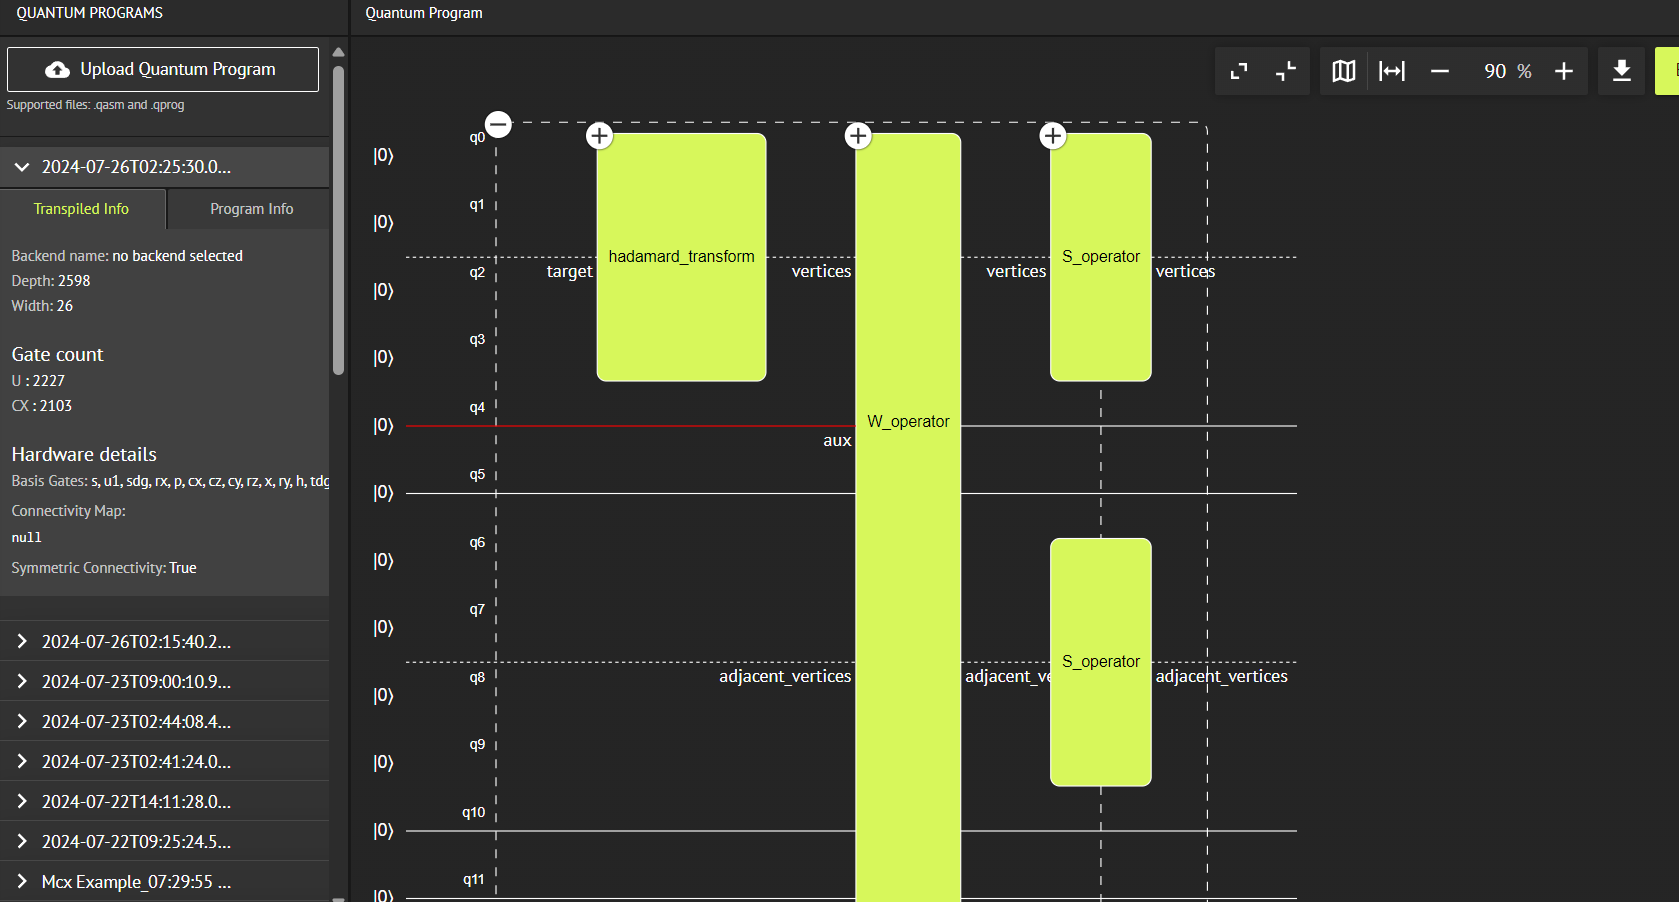

In [37]:
import numpy as np
from scipy.sparse import kron, identity, dok_matrix
from IPython.display import Image

print("Explanation for the Code:")
BOLD = '\033[1m'
END = '\033[0m'
print("")
print("We'll first start by explaining what quantum walk means. A quantum walk is a quantum analog of a classical random walk, which involves the movement of a particle on a graph according to specific probabilistic results.")
print(f"{BOLD}Classical Random Walk:{END} In a classical random walk, a particle moves step-by-step on a graph.")
print(f"{BOLD}Quantum Walk:{END} In contrast, a quantum walk uses the principles of quantum mechanics, notably superposition and interference. There are two types of quantum walks: Discrete-Time Quantum Walkk (DTQW) and Continuous-Time Quantum Walk (CTQW). Here we've considered the case of DTQW.")
print(f"{BOLD}Discrete-Time Quantum Walk:{END} (Cited from \"Lecture Notes on Quantum Algorithms\", Andrew Childe) In the simplest case, at each step we simply move from any given vertex to each of its neighbours with equal probability, therefore the walk is governed by the |V|*|V| matrix where V is the number of vertices.")
print("")
print("This algorithm aims to implement a quantum walk on a line with 16 nodes. This involves setting up the initial quantum states, defining the walk operator (W_operator), and applying the swap operator (S_operator).")
print("We consider the size as 4 since log2(16) = 4 qubits for 16 nodes")
print(f"{BOLD}prepare_minus Function:{END} This function prepares the |-⟩ state by applying the X and H gates to a given qubit.")
print(f"{BOLD}diffuzer_oracle Function:{END} This function defines a diffuser oracle that flips the auxiliary qubit if the input qubit state is not zero.")
print(f"{BOLD}zero_diffuzer Function:{END} This function prepares the auxiliary qubit in the |-⟩ state and then applies the diffuser oracle.")
print(f"{BOLD}W_iteration Function:{END} This function defines a single iteration of the quantum walk for a given state. It calculates the probability distribution for moving between adjacent nodes and normalizes it to sum to 1.")
print(f"{BOLD}W_operator Function:{END} This function defines the full walk operator by iterating over all possible states. It applies the W_iteration function to all possible states of the vertices.")
print("The next three functions define the edge oracle and the bitwise swap operations.")
print(f"{BOLD}edge_oracle Function:{END} This function defines an edge oracle that flips the result qubit if the sum of the vertices and adjacent vertices is odd.")
print(f"{BOLD}bitwise_swap Function:{END} This function performs a bitwise swap between two qubit arrays.")
print(f"{BOLD}S_operator Function:{END} This function applies the swap operation conditionally based on the result of the edge oracle.")
print(f"{BOLD}main Function:{END} This function sets up the initial states and applies the walk and swap operators. It allocates the qubits, applies the Hadamard transform to the vertices, and then applies the walk and swap operators.")
print("The last part of the code creates the quantum model and synthesizes it into a quantum program.")
print("Here I'll attach a screen grab of the circuit formed from this code")
print("")
Image("Classiq6.12a.png")


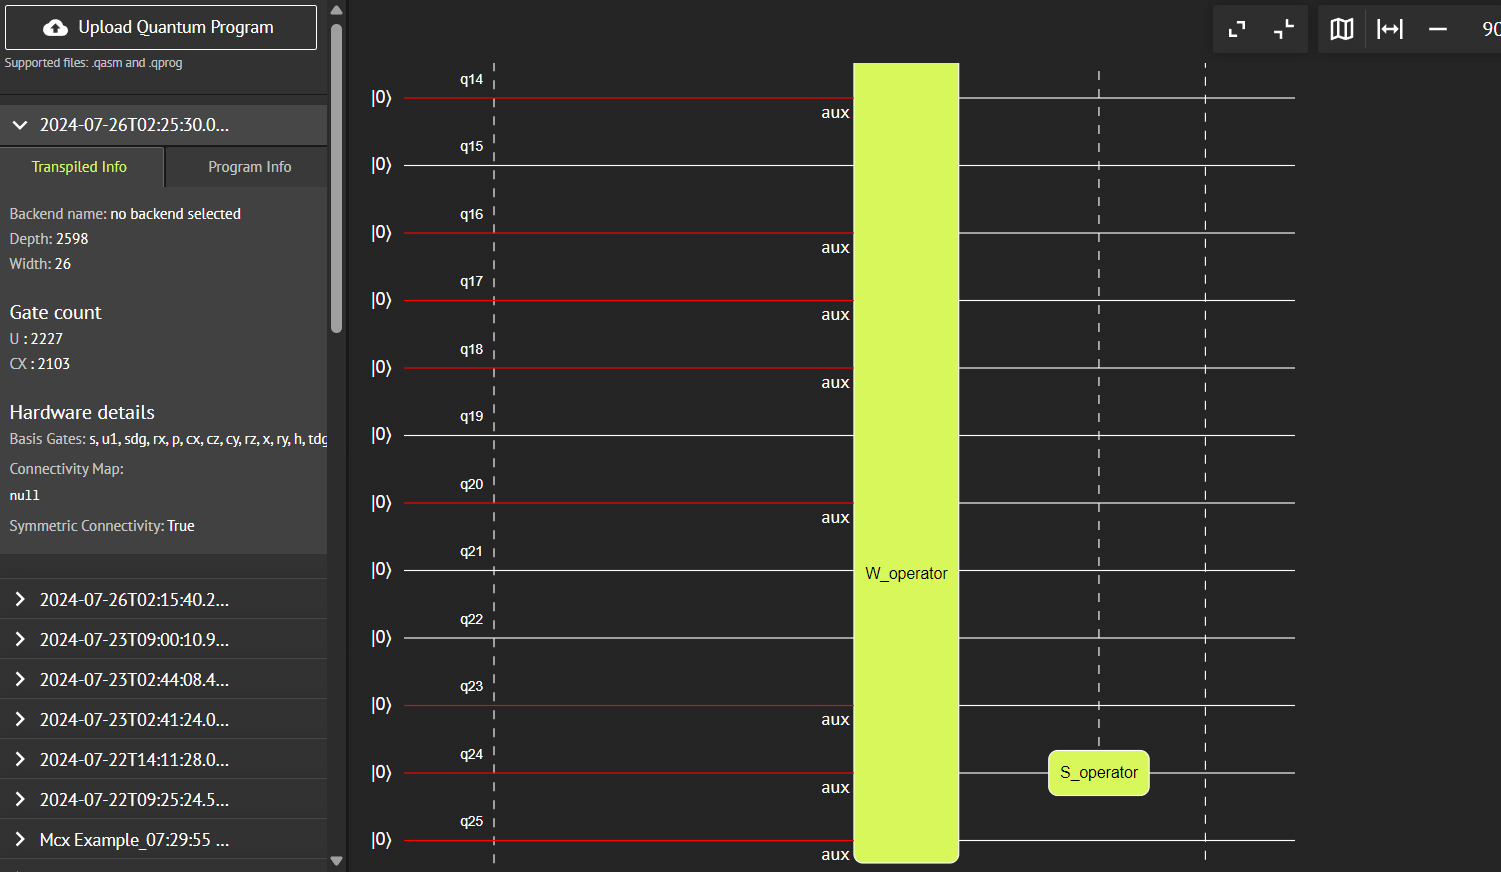

In [38]:
from IPython.display import Image

Image("Classiq6.12b.png")